This notebook uses the Wisconsin Breast Cancer data to try and predict if a tumor is benign or malignant.
This notebook has 2 parts: 
1. **Standard Classification Pipeline** - includes data cleaning, feature scaling, classifier selection and hyper-parameters tuning for best performance.
2. **Misclassification Analysis** -  Using Scatter plots and the MAGIC tool.

Link to dataset: [here](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).

# Part 1: Standard Classification Pipeline

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("/content/drive/MyDrive/שנה א' - סמסטר א'/מדעי נתונים טבלאיים/מחברות לפרוייקט/breast_cancer_wisconsin.csv")
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

The data was extracted from computerized images of a Fine Needle Aspiration biopsy (FNA) taken from cells suspected of being breast cancer (FNA includes the extraction of tissue parts or cells through the insertion of a needle).

An illustration of the digitized picture (from the [first paper that used the dataset](https://www.researchgate.net/publication/2512520_Nuclear_Feature_Extraction_For_Breast_Tumor_Diagnosis)):


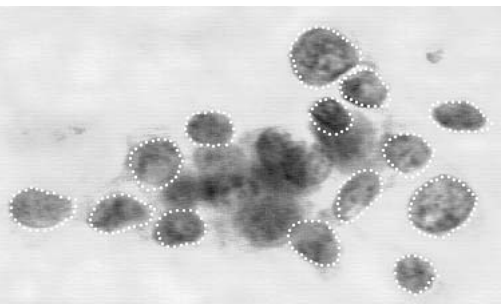

The data contains the following attributes:

* **id**.
* **Diagnosis** – M for Malignant and B for Benign.
* **measures** - 10 measures describing the cell.

The 10 measures are:

1. **radius** - the average distance from the center of the cell to its circumference.
2. **texture** - according to the gray values in the image.
3. **perimeter**.
4. **area**.
5. **Smoothness** - how smooth the cell is according to the different radius lengths.
6. **compactness**.
7. **concavity** - the percentage of concavity in the contours of the cell.
8. **concave points** – the number of concave points present in the outline of the cell.
9. **symmetry**.
10. **fractal dimension** - you can read more about it [here](https://en.wikipedia.org/wiki/Fractal_dimension).

For each of these 10 measures, 3 attributes were produced:

* **mean** – the average value.
* **se** – standard deviation.
* **worst** – the average of the three highest values measured for the measure.

Thus, for example, we can find the attributes:  radius_mean, radius _se, radius_worst.

Therefore, all and all, there are 10 X 3 attributes for each sample (excluding its id and diagnosis).

It is evident, then, that all the attributes are quantitative variables - continuous numbers, except for the id and the diagnosis.



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe().transpose()

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

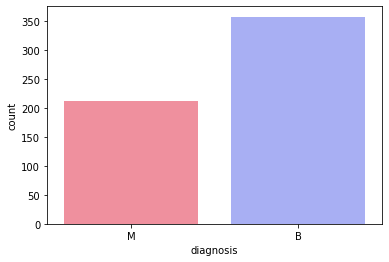

In [5]:
sns.countplot(x='diagnosis',data=df, palette = {'M': '#ff8093', 'B': '#9ca5ff'})

In [6]:
attributes = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal_dimension']

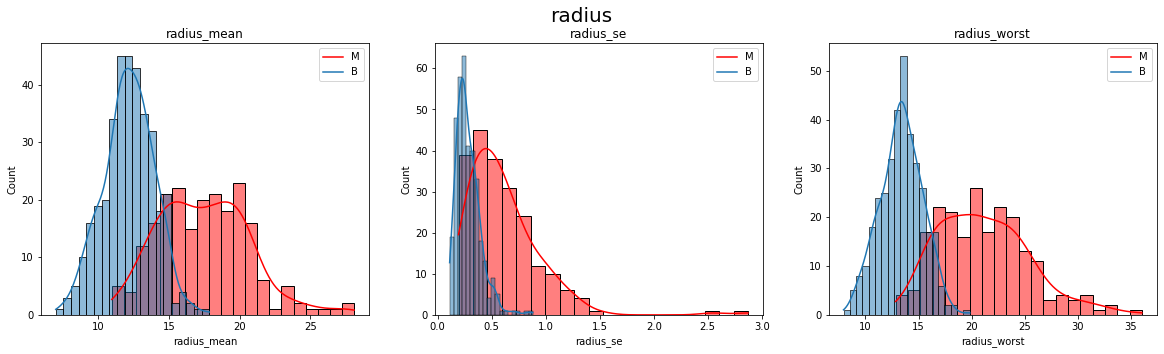

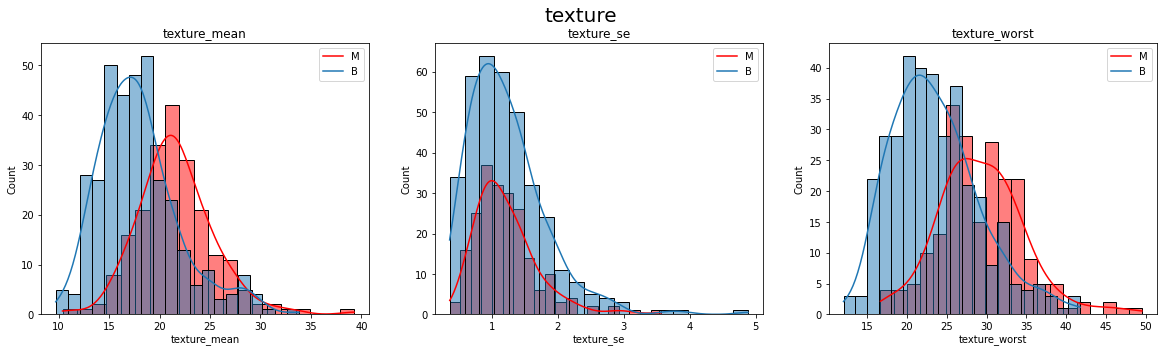

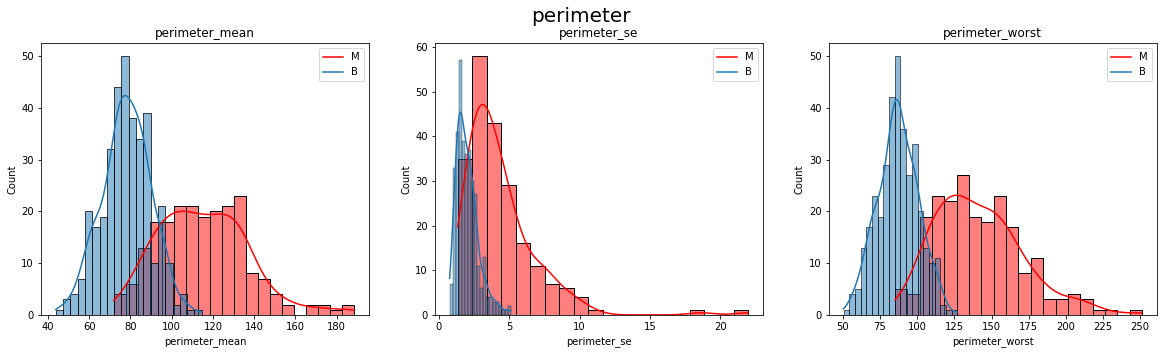

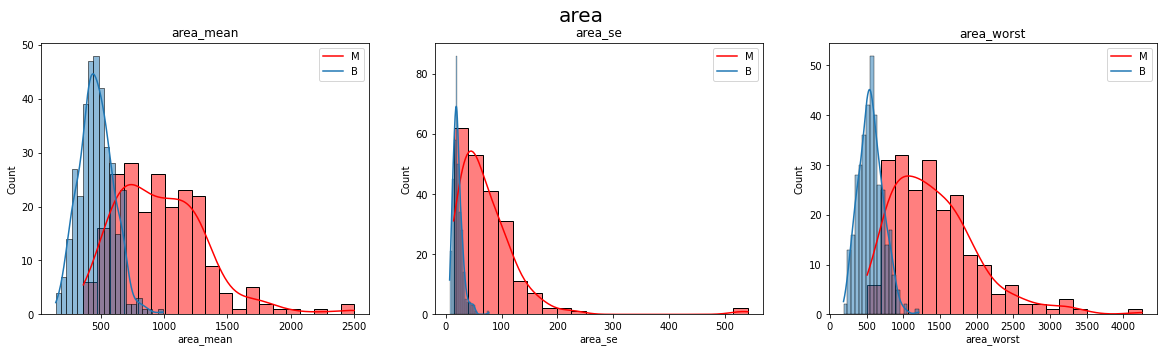

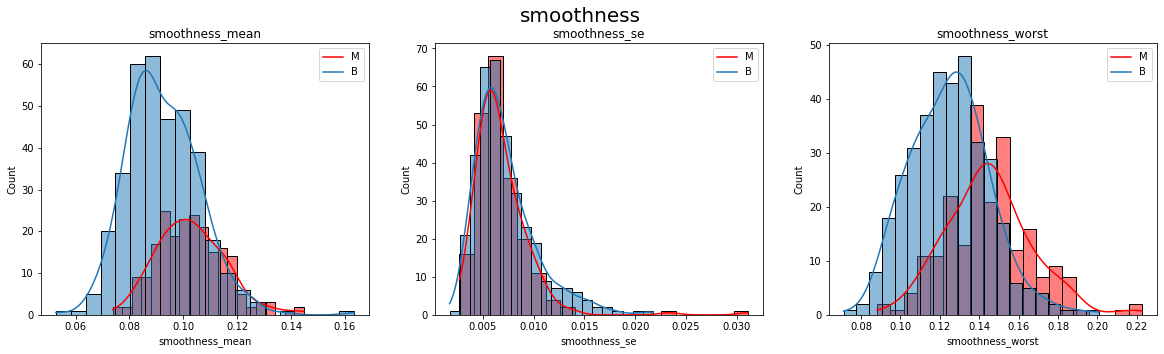

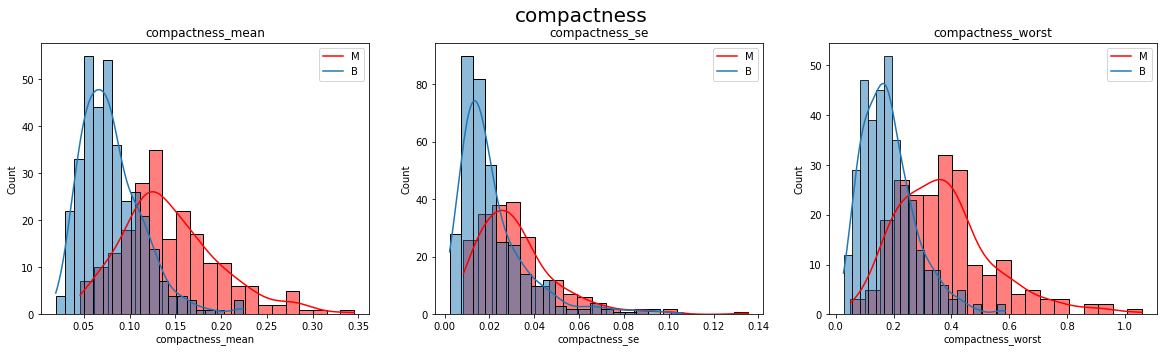

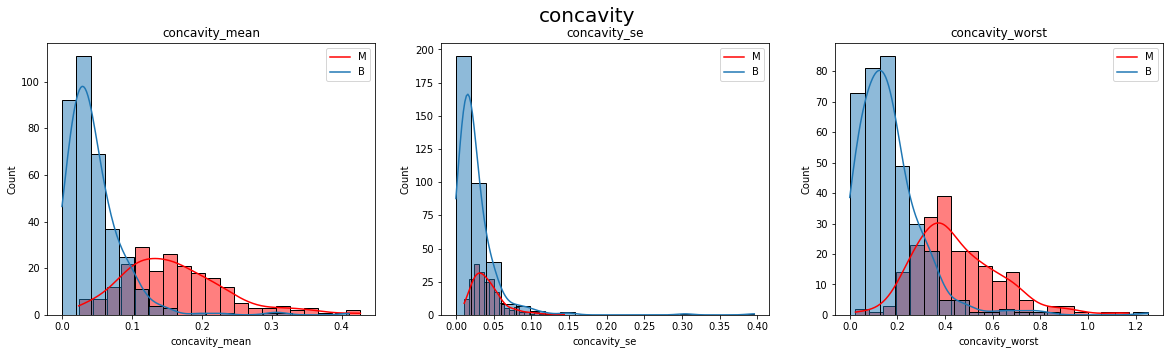

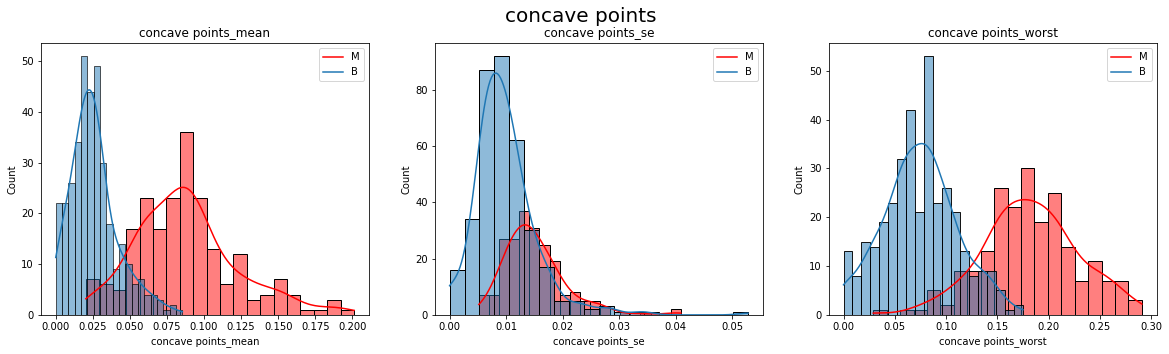

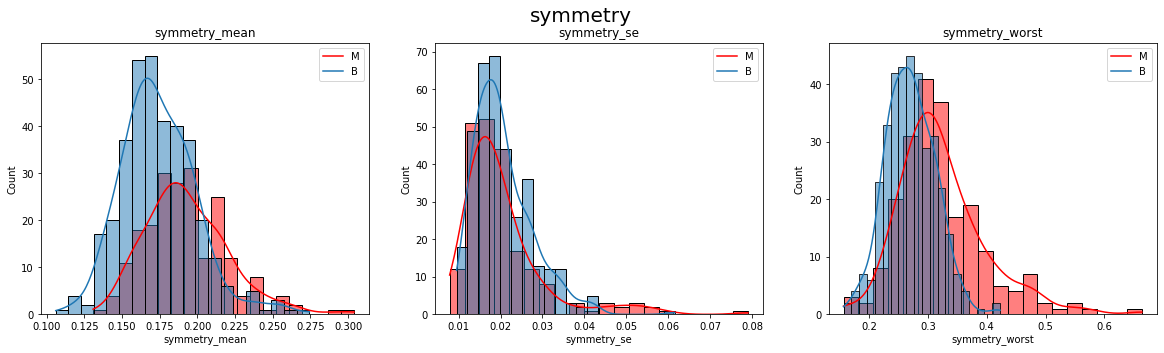

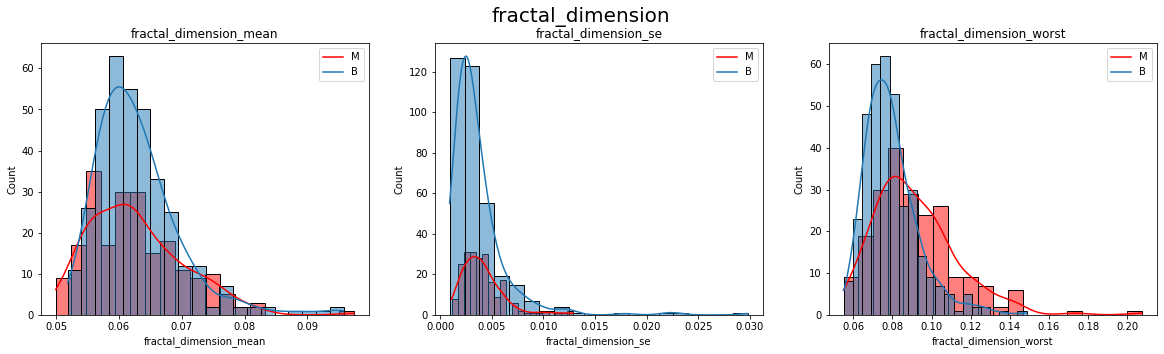

In [7]:
def plot_hist(ax, df, attribute):
  ax.set_title(attribute)
  sns.histplot(df[df.diagnosis == 'M'][attribute], kde=True, bins=20, ax=ax, color="red")
  sns.histplot(df[df.diagnosis == 'B'][attribute], kde=True, bins=20, alpha=0.5,ax=ax)
  ax.legend(['M', 'B'])

def plot_attribute_hists(df, attribute):
  fig, axs = plt.subplots(ncols=3)
  fig.set_size_inches(20,5)
  
  plot_hist(axs[0], df, attribute + '_mean')
  plot_hist(axs[1], df, attribute + '_se')
  plot_hist(axs[2], df, attribute + '_worst')
  
  fig.suptitle(attribute, fontsize=20)

for att in attributes:
  plot_attribute_hists(df, att)

By inspecting the histograms we gather initial insights and can see that:
1. Measures that create a separation in the diagnosis (even if not perfect) are measures related to size such as *area* and *radius*.
2. Concavity (mean and worst) also creates separation in the diagnosis.
3. measures that do **not** seem to create separation (and there is a good chance we will remove them later) – texture_se, Symmetry_se, concavity_se, all fractals metrics.

## Data Cleaning

In [8]:
df.drop(columns = ['id', 'Unnamed: 32'], inplace=True) # remove redundent column (note: in Unnamed all values are null)

## Feature Engineering

In [9]:
df['diagnosis']=df['diagnosis'].replace({'B':0, 'M':1})
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

## Data Correlation

### Mean Attributes Correlation

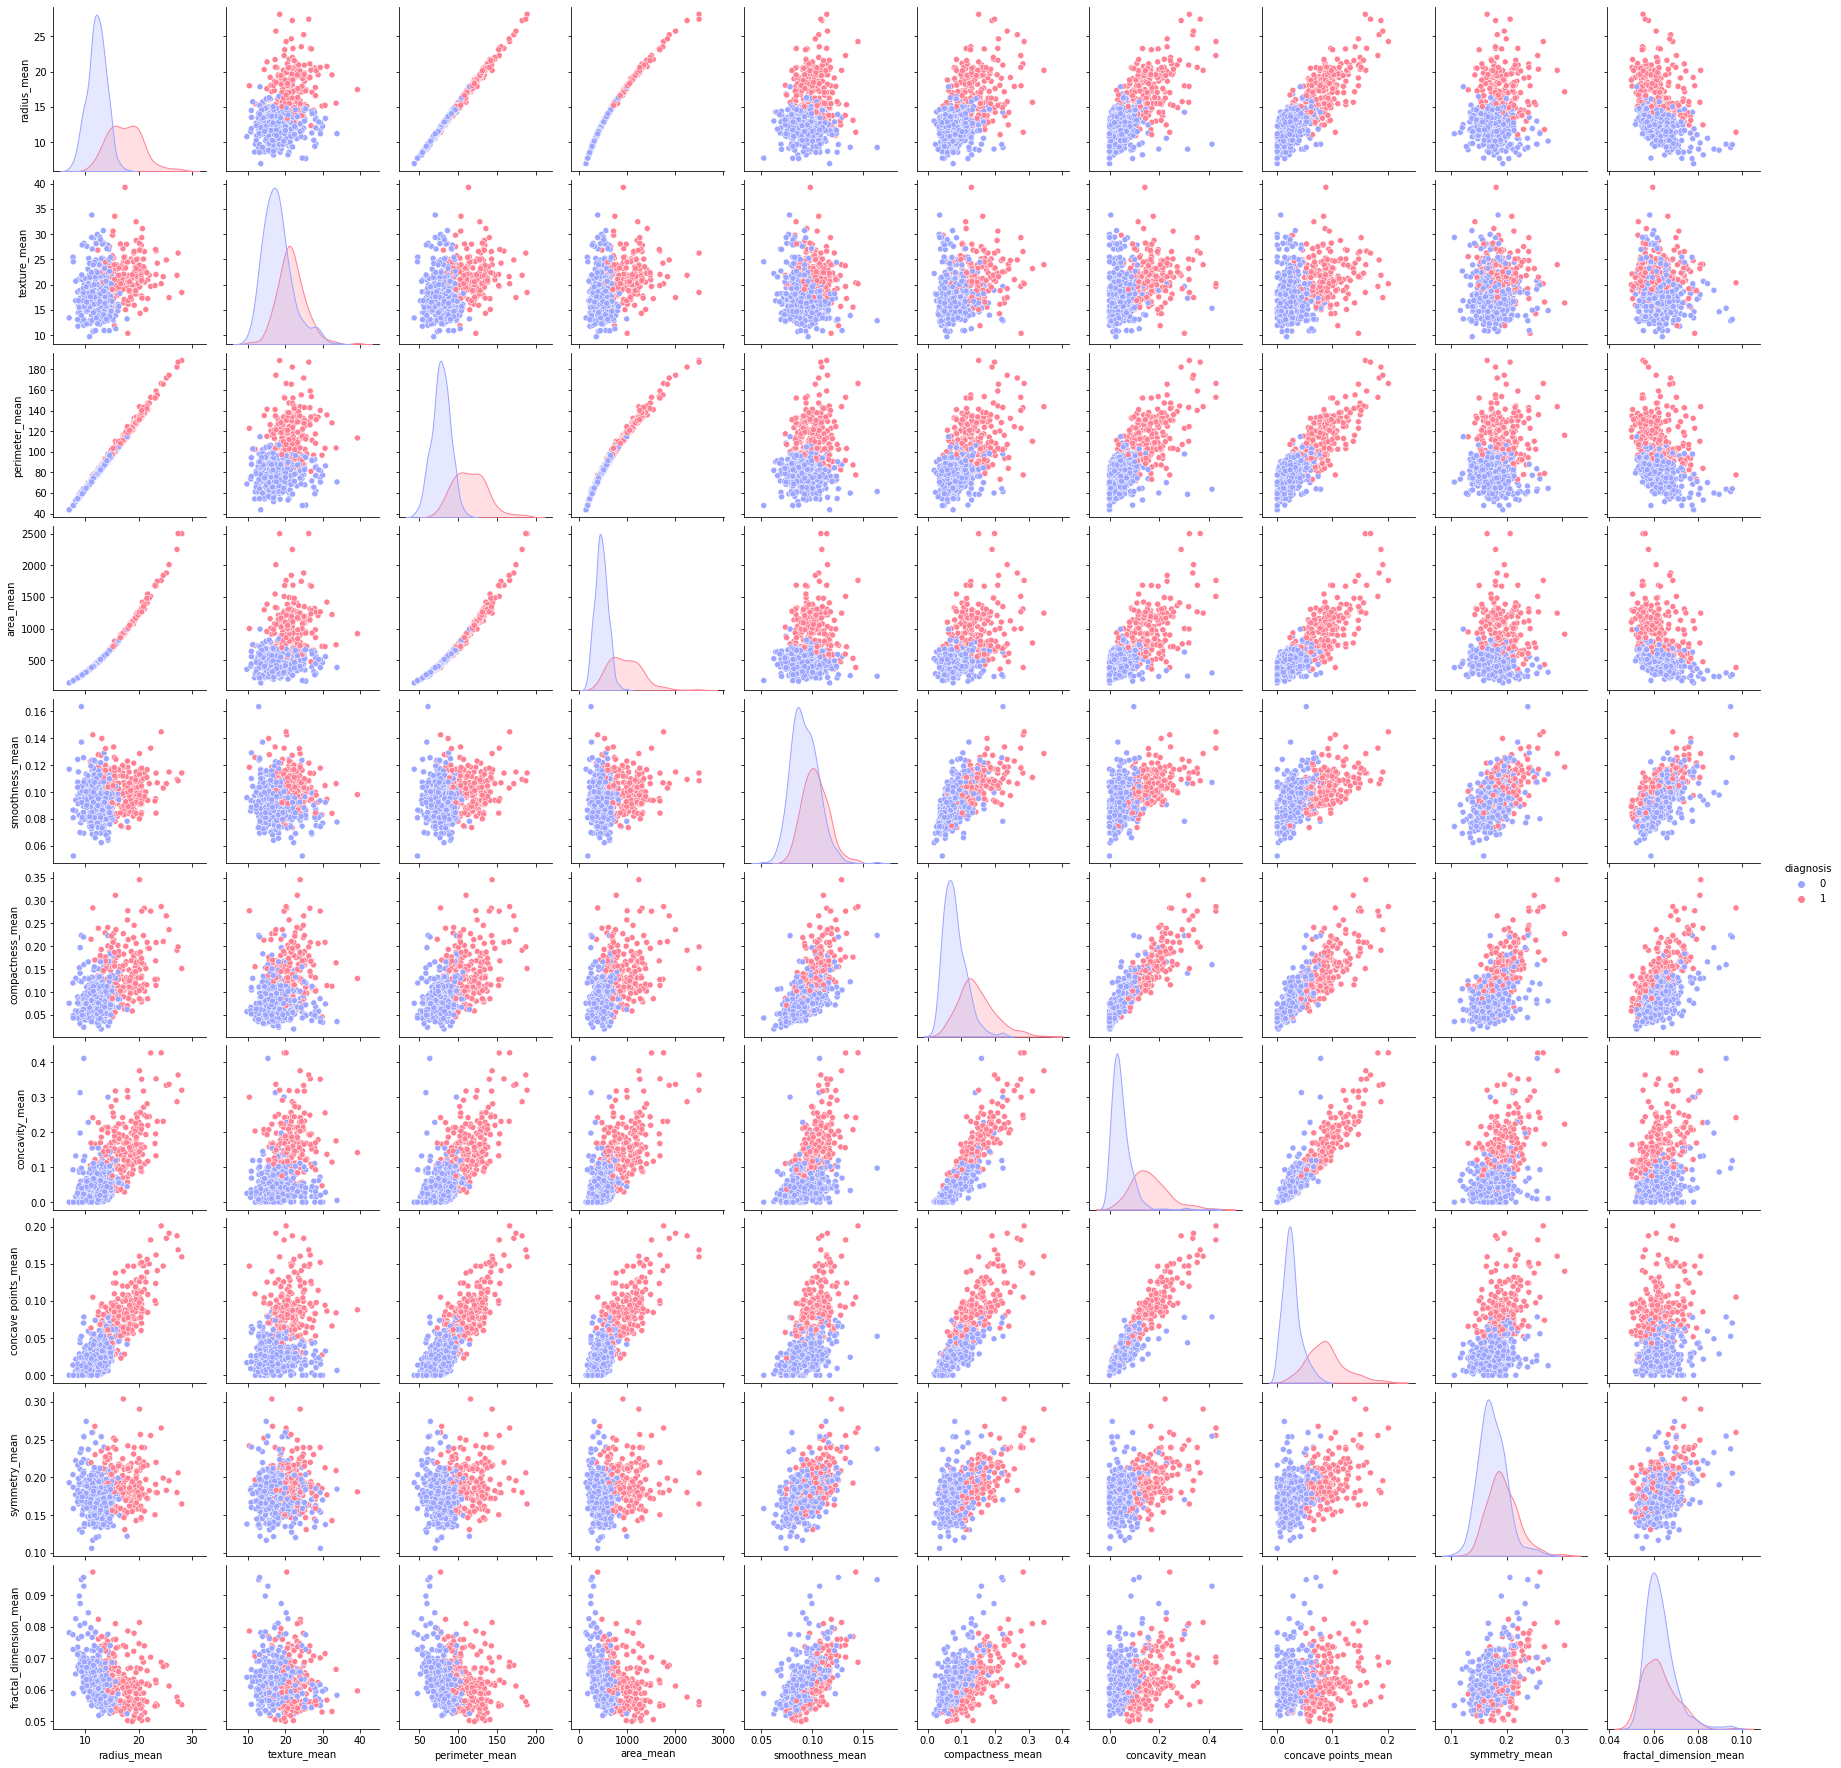

In [10]:
mean_df = df[[att + '_mean' for att in attributes] + ['diagnosis']]
sns.pairplot(mean_df, hue="diagnosis", palette = {0: '#9ca5ff', 1: '#ff8093'})

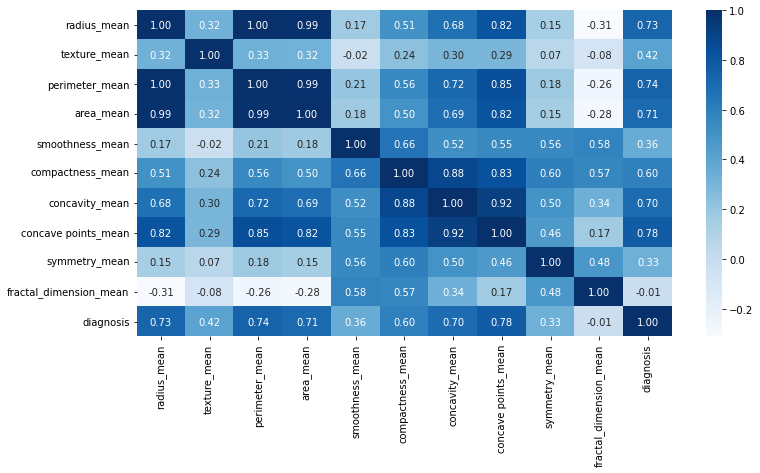

In [11]:
corr = mean_df.corr()
plt.figure(figsize = (12,6))
sns.heatmap(corr, annot=True,cmap='Blues',fmt='.2f')

* There is a high correlation between the spatial measurements - area, perimeter, radius. In addition, there is a high correlation between the concavity index and the radius. All this is not surprising since these are indicators of the cell's growth.
<br>
* It is interesting to see that there is a high correlation between the density (companess) and concavity but less than with measures such as radius, perimeter and area.
<br>
* The fractal measurements have the lowest correlation to others.
</div>

### SE Attributes Correlation

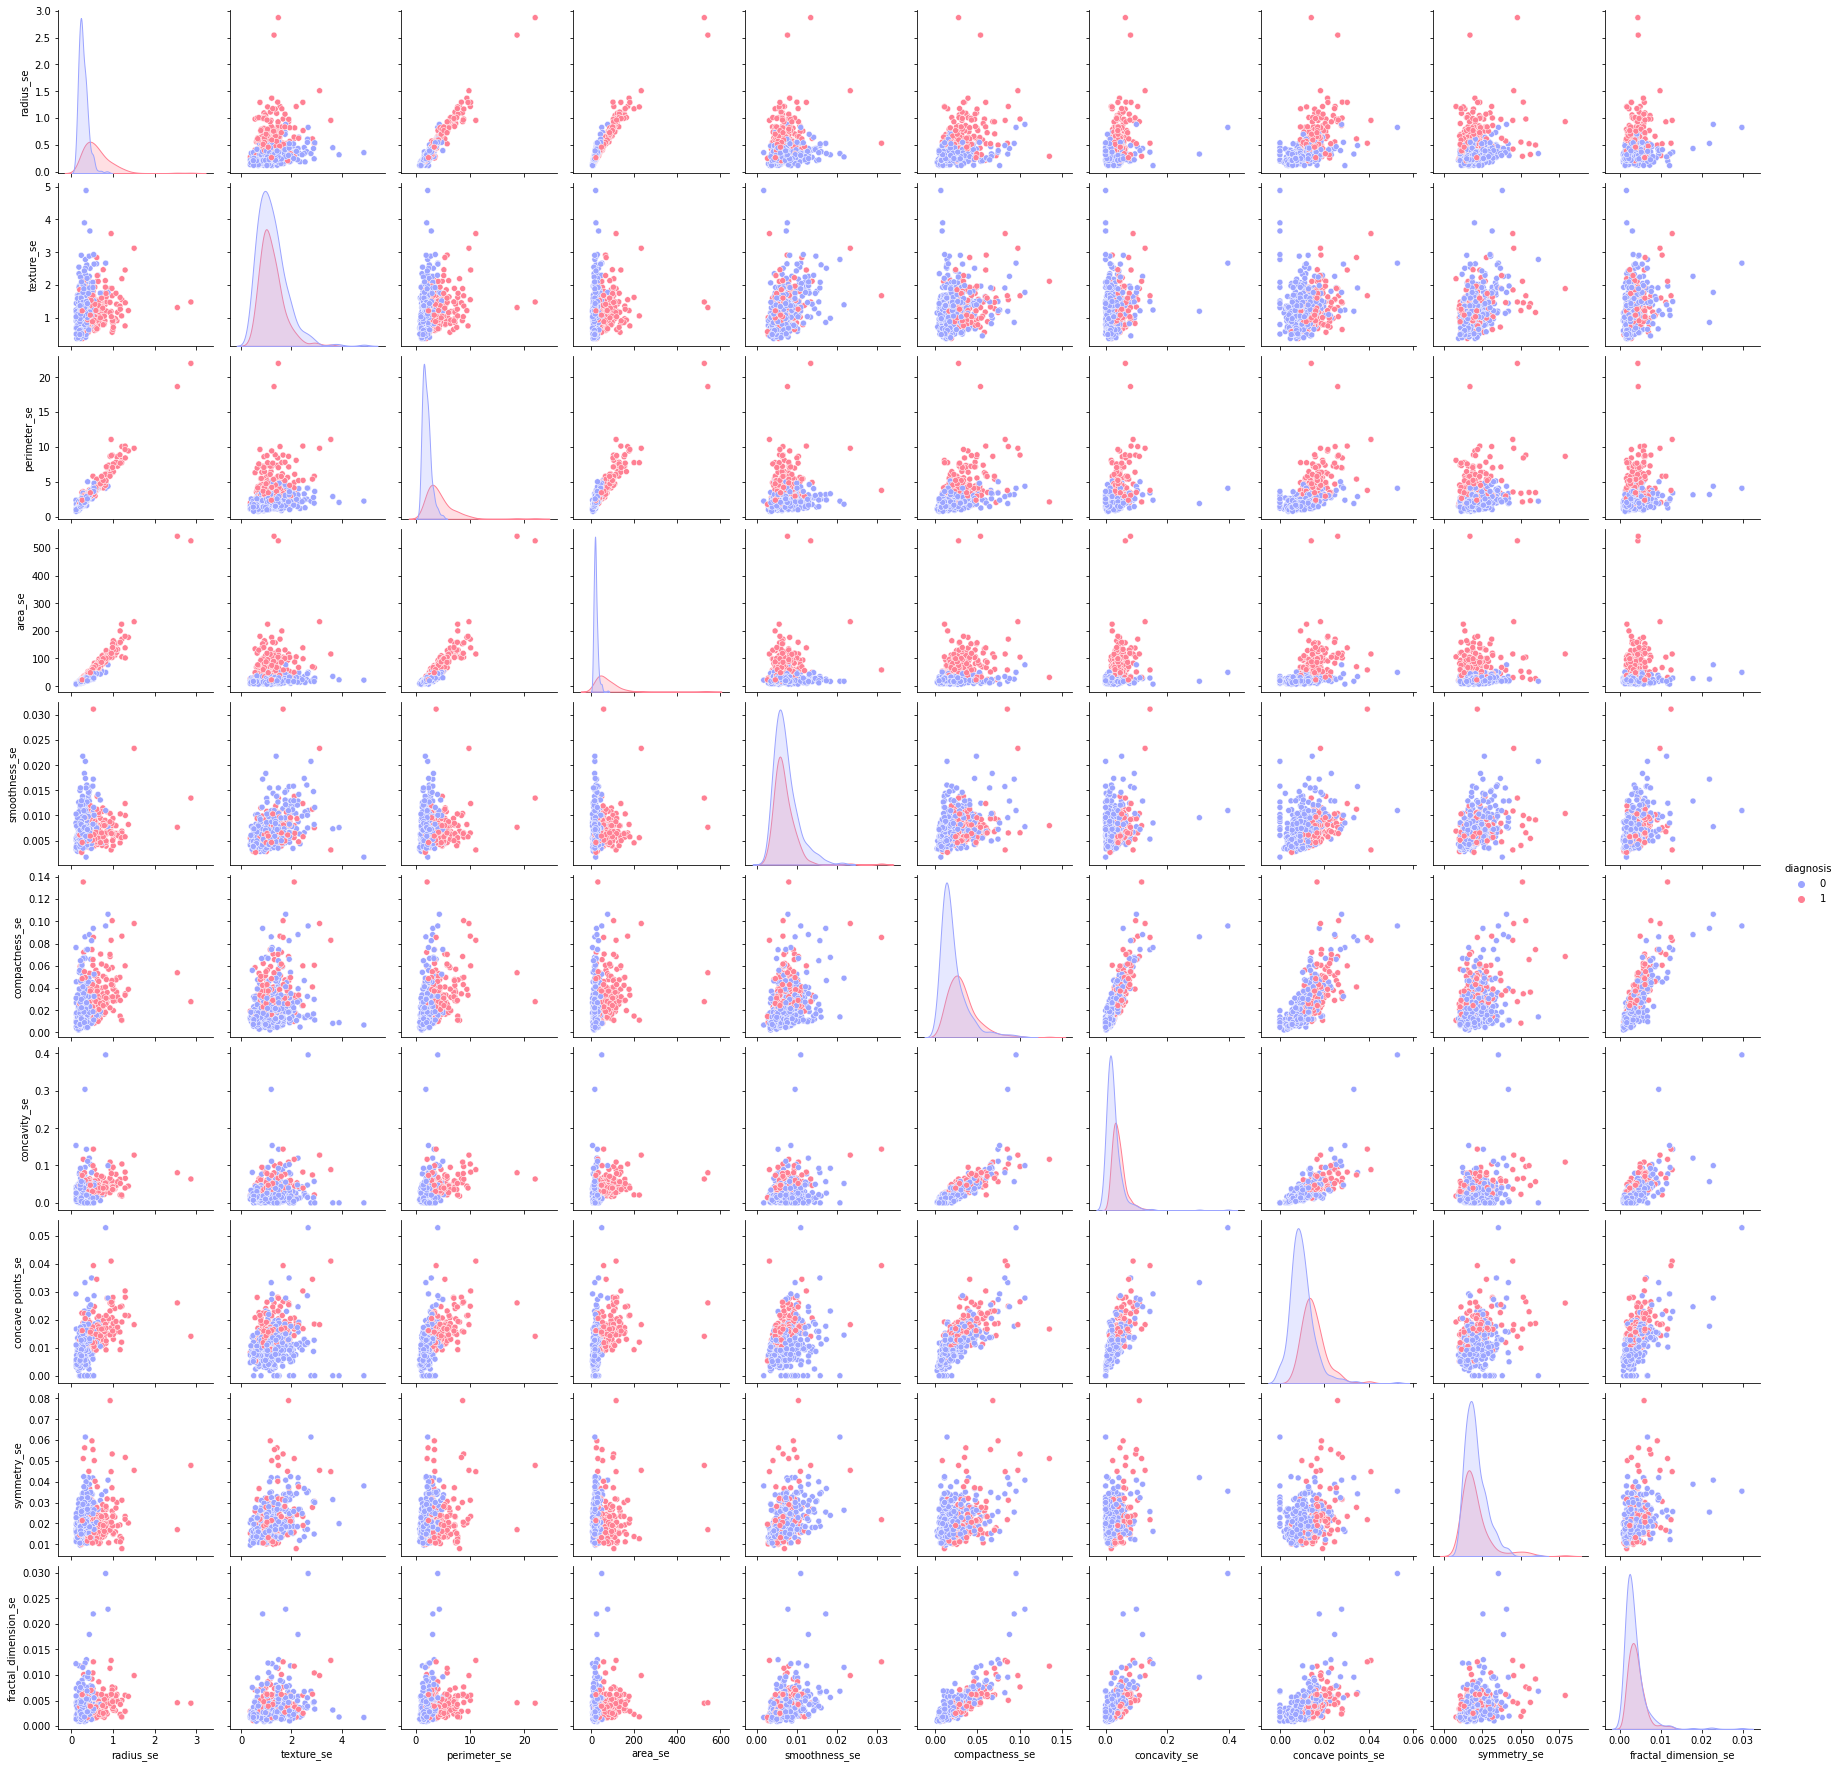

In [12]:
se_df = df[[att + '_se' for att in attributes] + ['diagnosis']]
sns.pairplot(se_df, hue="diagnosis", palette = {0: '#9ca5ff', 1: '#ff8093'})

Text(0.5, 1.0, 'SE Correlation Heatmap')

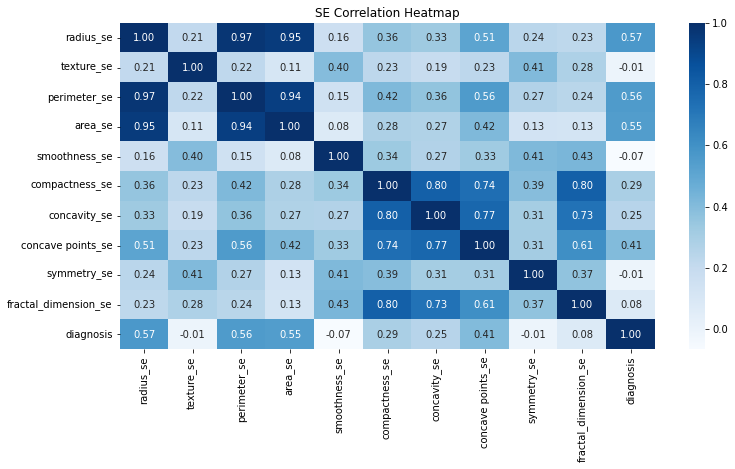

In [13]:
corr = se_df.corr()
plt.figure(figsize = (12,6))
sns.heatmap(corr, annot=True,cmap='Blues',fmt='.2f').set_title("SE Correlation Heatmap")

It is evident that attributes with high correlation in the mean values - also appear here with high correlation.
On the other hand, attributes with low correlation appear here with even lower correlation.

The same applies for the worst values (below) but in a more moderate way.
An exception is the fractal attributes for whom the correlation values have increased.

### Worst Attributes Correlation

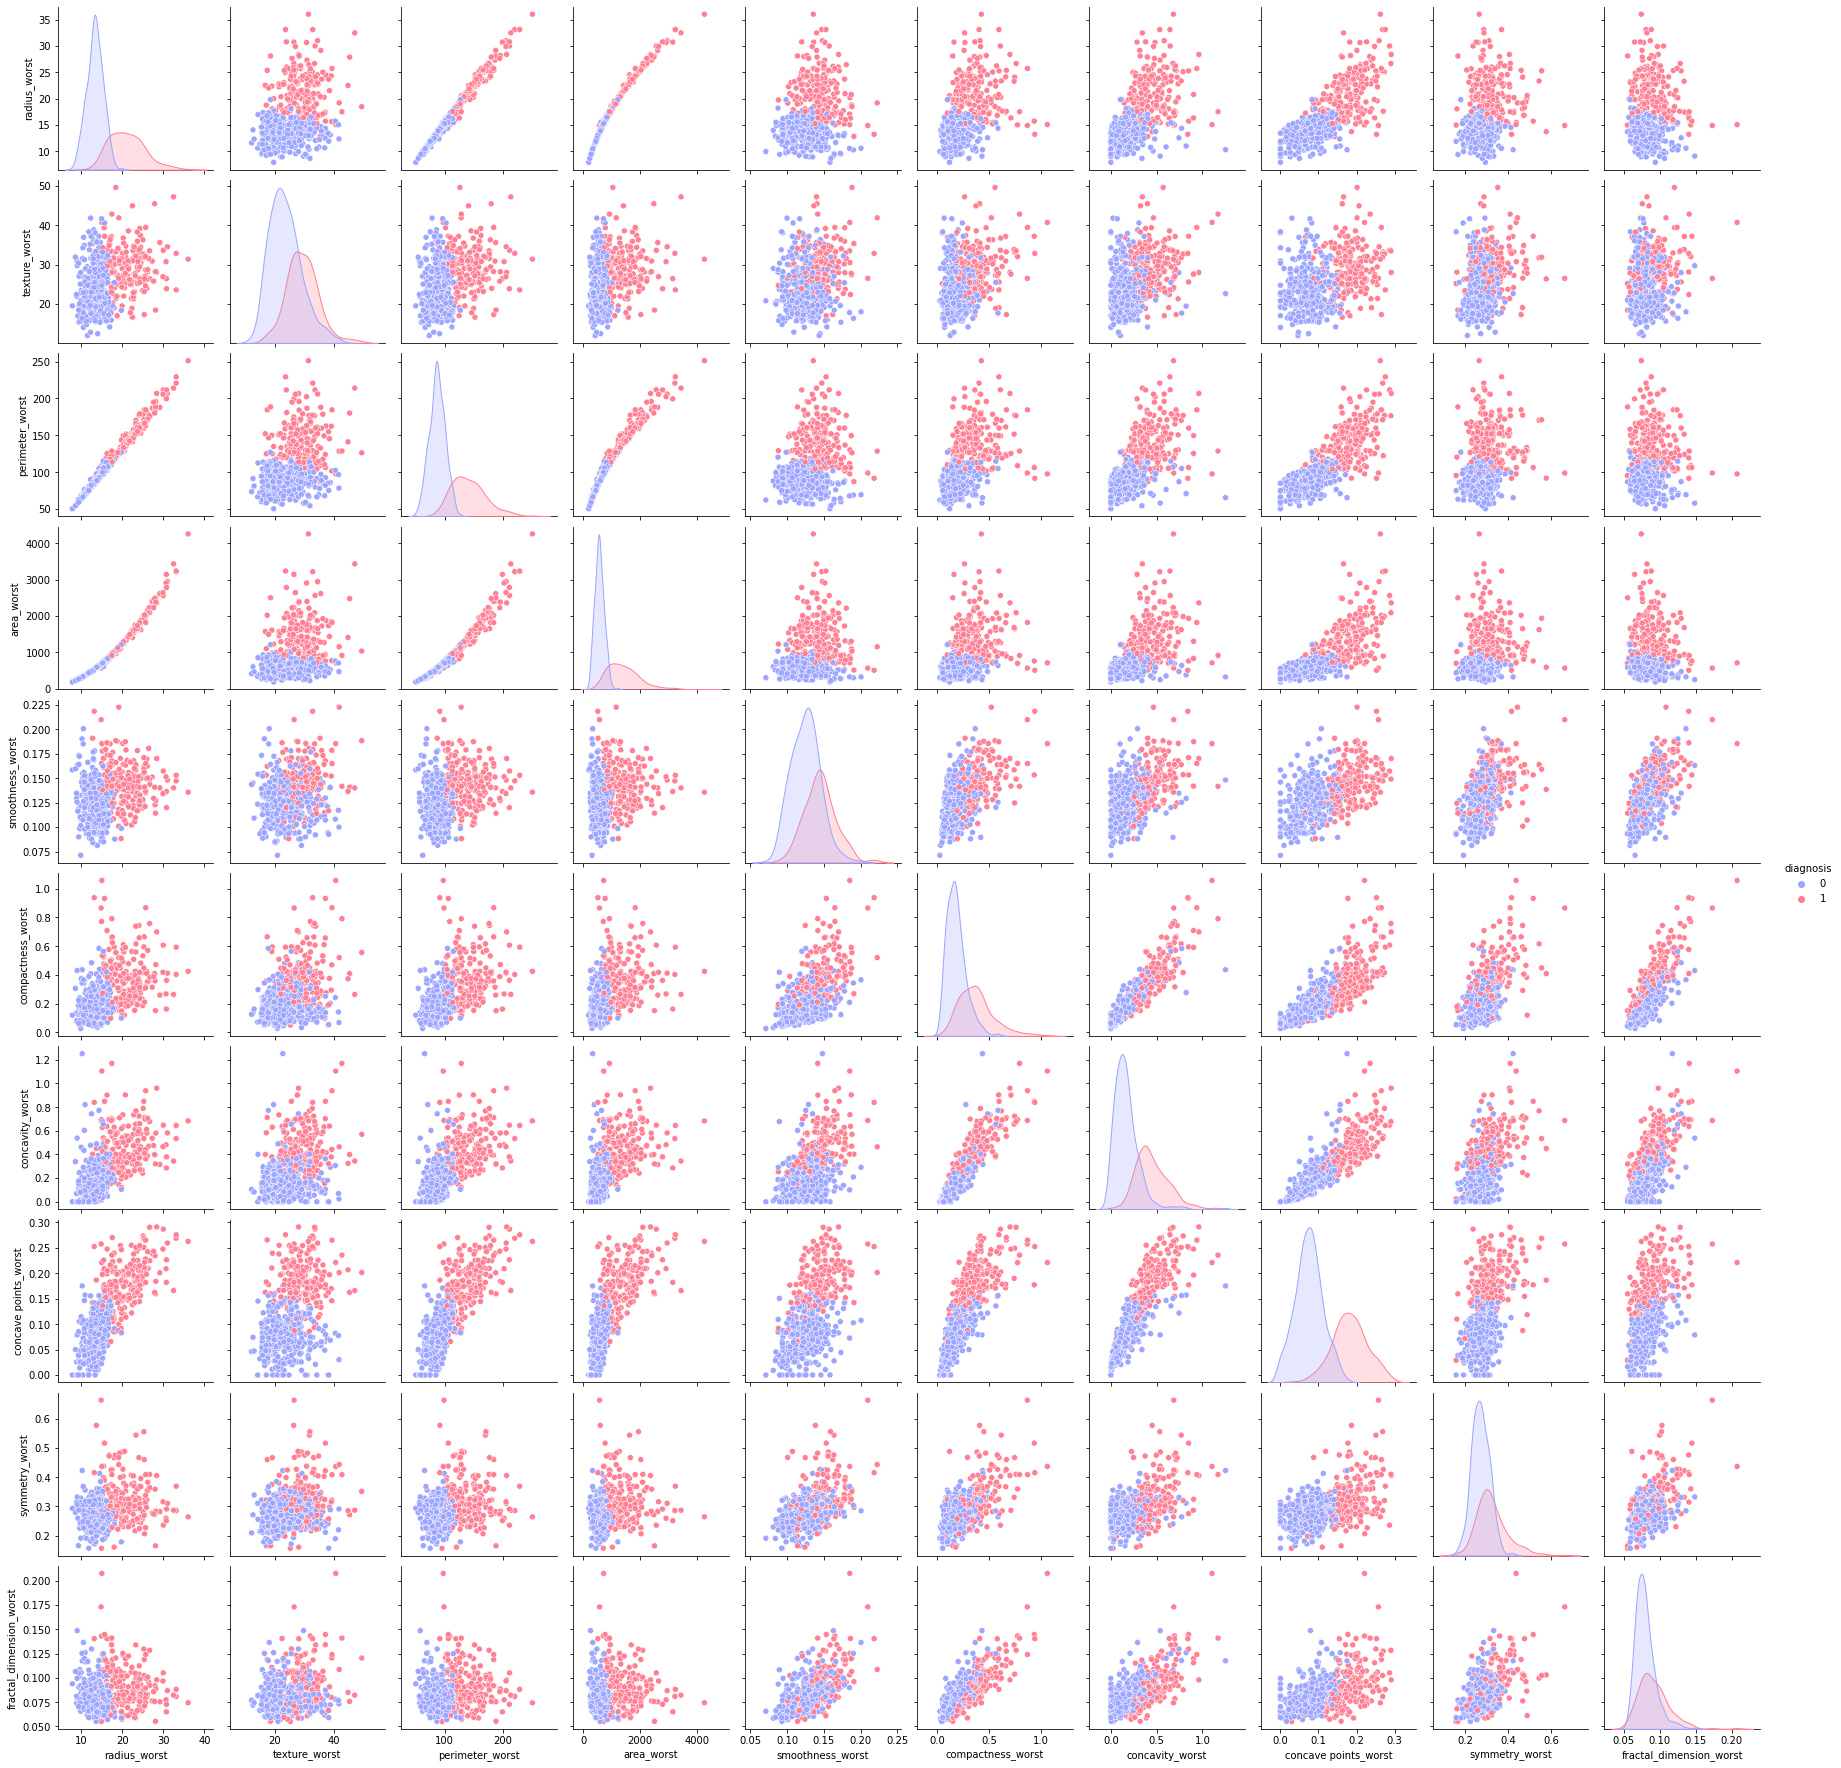

In [14]:
worst_df = df[[att + '_worst' for att in attributes] + ['diagnosis']]
sns.pairplot(worst_df, hue="diagnosis", palette = {0: '#9ca5ff', 1: '#ff8093'})

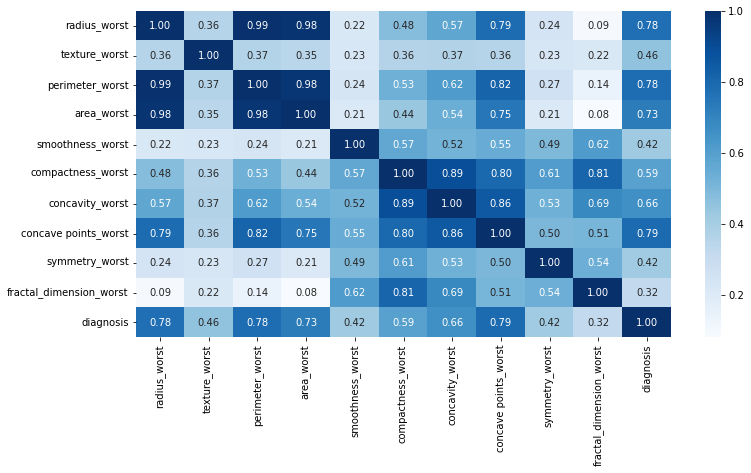

In [15]:
corr = worst_df.corr()
plt.figure(figsize = (12,6))
sns.heatmap(corr, annot=True,cmap='Blues',fmt='.2f')

### Correlation With Diagnosis

In [16]:
df.corr()[['diagnosis']].sort_values('diagnosis',ascending=False)

diagnosis
diagnosis                 1.000000
concave points_worst      0.793566
perimeter_worst           0.782914
concave points_mean       0.776614
radius_worst              0.776454
perimeter_mean            0.742636
area_worst                0.733825
radius_mean               0.730029
area_mean                 0.708984
concavity_mean            0.696360
concavity_worst           0.659610
compactness_mean          0.596534
compactness_worst         0.590998
radius_se                 0.567134
perimeter_se              0.556141
area_se                   0.548236
texture_worst             0.456903
smoothness_worst          0.421465
symmetry_worst            0.416294
texture_mean              0.415185
concave points_se         0.408042
smoothness_mean           0.358560
symmetry_mean             0.330499
fractal_dimension_worst   0.323872
compactness_se            0.292999
concavity_se              0.253730
fractal_dimension_se      0.077972
symmetry_se              -0.006522
texture_se               -0.008303
fractal_dimension_mean   -0.012838
smoothness_se            -0.067016

## Prepare Train And Test Data

In [17]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
X_train11, X_test11, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41)

In [18]:
scaler = MinMaxScaler() # After checking other scalers - the MinMaxScaler yielded the best results

# fit and transfrom while keeping the original indeces and columns, see: https://stackoverflow.com/questions/35723472/how-to-use-sklearn-fit-transform-with-pandas-and-return-dataframe-instead-of-num

X_train = pd.DataFrame(scaler.fit_transform(X_train11), index=X_train11.index, columns=X_train11.columns)
X_test = pd.DataFrame(scaler.transform(X_test11), index=X_test11.index, columns=X_test11.columns)

X_train.describe().transpose()

count      mean       std  min       25%       50%  \
radius_mean              455.0  0.350828  0.169594  0.0  0.232423  0.317160   
texture_mean             455.0  0.324916  0.145530  0.0  0.219310  0.310788   
perimeter_mean           455.0  0.345953  0.170941  0.0  0.225761  0.308727   
area_mean                455.0  0.239800  0.159374  0.0  0.130904  0.194636   
smoothness_mean          455.0  0.472535  0.150522  0.0  0.362279  0.468665   
compactness_mean         455.0  0.259517  0.159928  0.0  0.133749  0.230507   
concavity_mean           455.0  0.206098  0.182657  0.0  0.067198  0.140933   
concave points_mean      455.0  0.239654  0.190096  0.0  0.099056  0.162177   
symmetry_mean            455.0  0.404816  0.146071  0.0  0.302817  0.396533   
fractal_dimension_mean   455.0  0.280061  0.149526  0.0  0.170124  0.255514   
radius_se                455.0  0.202116  0.173576  0.0  0.083757  0.148193   
texture_se               455.0  0.237871  0.149512  0.0  0.132332  0.203858   
perimeter_se             455.0  0.196320  0.167728  0.0  0.080432  0.145447   
area_se                  455.0  0.140304  0.157015  0.0  0.048356  0.077445   
smoothness_se            455.0  0.150695  0.104621  0.0  0.085058  0.127569   
compactness_se           455.0  0.172864  0.134773  0.0  0.079258  0.134572   
concavity_se             455.0  0.104033  0.089302  0.0  0.048502  0.085122   
concave points_se        455.0  0.284307  0.144703  0.0  0.182665  0.266748   
symmetry_se              455.0  0.170370  0.105743  0.0  0.099384  0.150391   
fractal_dimension_se     455.0  0.130380  0.114366  0.0  0.060559  0.101215   
radius_worst             455.0  0.329844  0.188456  0.0  0.202778  0.282540   
texture_worst            455.0  0.393111  0.173973  0.0  0.266505  0.383039   
perimeter_worst          455.0  0.316373  0.183753  0.0  0.189194  0.265470   
area_worst               455.0  0.212742  0.170389  0.0  0.101746  0.158156   
smoothness_worst         455.0  0.363901  0.162119  0.0  0.245490  0.354793   
compactness_worst        455.0  0.216876  0.154326  0.0  0.108950  0.177282   
concavity_worst          455.0  0.219843  0.166699  0.0  0.093251  0.181070   
concave points_worst     455.0  0.394522  0.224902  0.0  0.219691  0.343986   
symmetry_worst           455.0  0.317709  0.143549  0.0  0.222618  0.299834   
fractal_dimension_worst  455.0  0.192344  0.117935  0.0  0.112259  0.163977   

                              75%  max  
radius_mean              0.434755  1.0  
texture_mean             0.410720  1.0  
perimeter_mean           0.433157  1.0  
area_mean                0.304795  1.0  
smoothness_mean          0.568806  1.0  
compactness_mean         0.340531  1.0  
concavity_mean           0.307638  1.0  
concave points_mean      0.357381  1.0  
symmetry_mean            0.484832  1.0  
fractal_dimension_mean   0.351824  1.0  
radius_se                0.255742  1.0  
texture_se               0.317693  1.0  
perimeter_se             0.243722  1.0  
area_se                  0.166261  1.0  
smoothness_se            0.187401  1.0  
compactness_se           0.224134  1.0  
concavity_se             0.137788  1.0  
concave points_se        0.355501  1.0  
symmetry_se              0.208434  1.0  
fractal_dimension_se     0.165635  1.0  
radius_worst             0.430357  1.0  
texture_worst            0.517359  1.0  
perimeter_worst          0.417240  1.0  
area_worst               0.274670  1.0  
smoothness_worst         0.458083  1.0  
compactness_worst        0.300172  1.0  
concavity_worst          0.309665  1.0  
concave points_worst     0.561856  1.0  
symmetry_worst           0.387741  1.0  
fractal_dimension_worst  0.245441  1.0

# Classify Using KNN

Best parameters search:

In [19]:
parameters = {
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'n_neighbors': [3,5,7,9],    
              'weights' : ['uniform', 'distance']              
             }
knn11 = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
knn11.fit(X_train, y_train)
cv_results = pd.DataFrame(knn11.cv_results_)

In [20]:
cv_results[['param_algorithm', 'mean_test_score']].groupby('param_algorithm').mean('mean_test_score')

mean_test_score
param_algorithm                 
ball_tree               0.956044
brute                   0.956044
kd_tree                 0.956044

In [21]:
cv_results[['param_n_neighbors', 'mean_test_score']].groupby('param_n_neighbors').mean('mean_test_score')

mean_test_score
param_n_neighbors                 
3                         0.956044
5                         0.960440
7                         0.953846
9                         0.953846

In [22]:
cv_results[['param_weights', 'mean_test_score']].groupby('param_weights').mean('mean_test_score')

mean_test_score
param_weights                 
distance              0.956044
uniform               0.956044

To reach a score of 0.96 in all algorithms, K should be either 3 or 5. Therefore I will randomly choose a value of K=3.

In [23]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)         
knn.score(X_test, y_test) 

0.9824561403508771

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


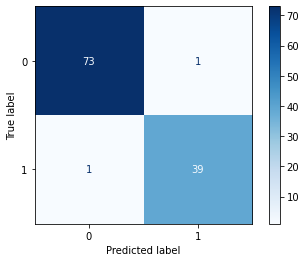

In [24]:
plot_confusion_matrix(knn, X_test, y_test, values_format="d", cmap='Blues')

Note: SVM with the best parameters possiblae yields the same scores:

In [25]:
parameters = {
              'C':[0.1, 1, 10],               
              'gamma':['scale', 'auto'],
              'kernel':('linear', 'poly','rbf', 'sigmoid')              
             }
svm11 = GridSearchCV(SVC(), parameters, cv=5)
svm11.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [26]:
svm = SVC(kernel = svm11.best_params_['kernel'],
           C = svm11.best_params_['C'],
           gamma = svm11.best_params_['gamma'])
svm.fit(X_train, y_train)         
svm.score(X_test, y_test) 

0.9824561403508771

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


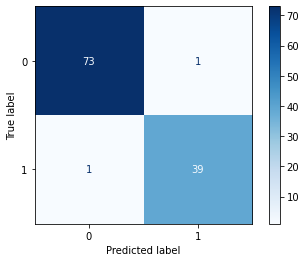

In [27]:
plot_confusion_matrix(svm, X_test, y_test, values_format="d", cmap='Blues')

# Part 2: Misclassification Analysis

The model made an accute mistake: it classified a patient that has cancer (diagnosis = 1) as healthy (diagnosis = 0).

In this section We'll try to analyse why.

The interesting thing is that the SVM and the KNN misclassified **a different sample**: knn misclassified sample 514 and svm misclassified sample 197.

In [28]:
predicions = knn.predict(X_test)
misclassification_index = [i for i in range(len(X_test)) if predicions[i] == 0 and y_test.iloc[i] == 1][0]
index_in_df = y_test.reset_index().iloc[misclassification_index]['index']
print(f'the index of the problematic sample misclassified by the knn: {index_in_df}')

the index of the problematic sample misclassified by the knn: 514


In [29]:
predicions = svm.predict(X_test)
misclassification_index = [i for i in range(len(X_test)) if predicions[i] == 0 and y_test.iloc[i] == 1][0]
index_in_df = y_test.reset_index().iloc[misclassification_index]['index']
print(f'the index of the problematic sample misclassified by the svm: {index_in_df}')

the index of the problematic sample misclassified by the svm: 197


## 2.a Misclassification Analysis With Scatter Plot

In this section, scatter plots will be used for better visualization.

For simplisity, I will use only the 4 most correlated attributes with the target label.

First - we will create a copy of the train-set (attributes + target label):

In [30]:
X_train1 = X_train.copy(deep = True)
y_train1 = y_train.copy(deep = True)
df1 = pd.concat([X_train1, y_train1], axis = 1)
df1['diagnosis'].replace({0:'B', 1:'M'},inplace = True)
df1.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
475     0.288996      0.203585        0.282698   0.172514         0.410231   
298     0.359652      0.286101        0.342925   0.232423         0.142609   
220     0.329512      0.116672        0.318777   0.201946         0.476051   
549     0.189683      0.490362        0.181476   0.103537         0.318128   
567     0.672909      0.663510        0.696334   0.532400         0.707831   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
475          0.194191        0.136715             0.152982       0.349404   
298          0.100669        0.057990             0.068290       0.311484   
220          0.207748        0.091097             0.127386       0.162514   
549          0.143059        0.036270             0.040557       0.496208   
567          0.790197        0.823336             0.755467       0.724269   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
475                0.200262  ...       0.208594         0.239309    0.129543   
298                0.128849  ...       0.376779         0.309632    0.195423   
220                0.294387  ...       0.123221         0.275588    0.160466   
549                0.290893  ...       0.552931         0.187210    0.098682   
567                0.441144  ...       0.779738         0.750126    0.503819   

     smoothness_worst  compactness_worst  concavity_worst  \
475          0.363283           0.221436         0.277636   
298          0.093385           0.178161         0.125000   
220          0.352671           0.208151         0.140495   
549          0.276972           0.125996         0.049473   
567          0.592501           0.814493         0.749760   

     concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
475              0.336186        0.342362                 0.150728          B  
298              0.258763        0.254455                 0.142464          B  
220              0.276838        0.193633                 0.210809          B  
549              0.112165        0.354954                 0.139184          B  
567              0.910653        0.599192                 0.452315          M  

[5 rows x 31 columns]

Then - we will add to it the misclassified sample(s):

In [31]:
predicions = knn.predict(X_test)
misclassification_index = [i for i in range(len(X_test)) if predicions[i] == 0 and y_test.iloc[i] == 1]
misclassified_samples = X_test.iloc[misclassification_index].copy(deep = True)
misclassified_samples['diagnosis'] = 'misclassified'

df1 = pd.concat([df1, misclassified_samples], axis = 0)
df1.tail()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
407     0.289985      0.394319        0.280818   0.176122         0.248507   
243     0.334453      0.475482        0.323549   0.211963         0.301944   
321     0.651169      0.336490        0.631263   0.536672         0.299446   
80      0.220811      0.380791        0.217049   0.122478         0.625285   
514     0.398686      0.316537        0.386595   0.265084         0.429239   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
407          0.195632        0.143533             0.092793       0.281690   
243          0.149347        0.110052             0.116501       0.386241   
321          0.203239        0.270619             0.383996       0.470206   
80           0.227716        0.107568             0.110984       0.423619   
514          0.204251        0.175398             0.215457       0.271398   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
407                0.244158  ...       0.426579         0.230421    0.141863   
243                0.094562  ...       0.407513         0.266029    0.160404   
321                0.021839  ...       0.313318         0.557829    0.453308   
80                 0.438742  ...       0.573136         0.190732    0.104688   
514                0.200699  ...       0.456460         0.354352    0.240791   

     smoothness_worst  compactness_worst  concavity_worst  \
407          0.090343           0.155595         0.146805   
243          0.087938           0.107338         0.108546   
321          0.170852           0.116618         0.208147   
80           0.526707           0.130197         0.140176   
514          0.306686           0.171714         0.228914   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
407              0.192474        0.219292                 0.173619   
243              0.209828        0.260870                 0.053588   
321              0.489691        0.354003                 0.028139   
80               0.210550        0.284391                 0.219533   
514              0.384880        0.170349                 0.095107   

         diagnosis  
407              B  
243              B  
321              M  
80               B  
514  misclassified  

[5 rows x 31 columns]

Now, we plot:

In [32]:
class_index = -1
attributes = ['concave points_mean','radius_worst', 'texture_mean', 'symmetry_worst']
class_label = df1.columns[class_index]

In [33]:
attributes

['concave points_mean', 'radius_worst', 'texture_mean', 'symmetry_worst']

In [34]:
color_dict = dict({'M':'#ff8093',
                  'B':'#9ca5ff',
                  'misclassified': 'black'})

In [35]:
combinations_count = int(len(attributes) * (len(attributes) - 1) / 2)

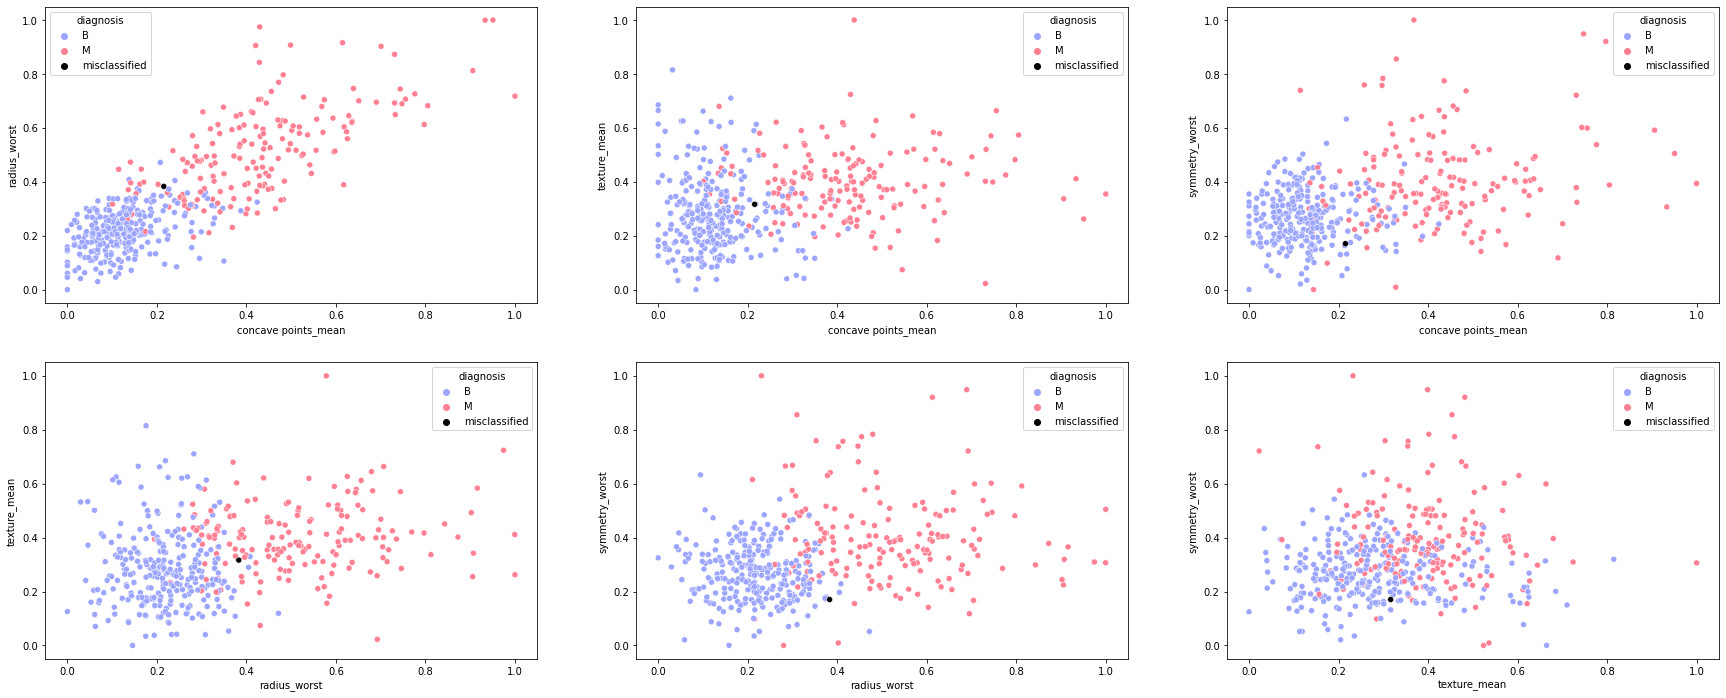

In [36]:
import math

x_ax_count = math.ceil(combinations_count / 3)
y_ax_count = 3

fig, axs = plt.subplots(x_ax_count,y_ax_count)
fig.set_size_inches(x_ax_count * 15, y_ax_count * 4)

ax_index = 0

for i in range(len(attributes)):
  for j in range(i + 1, len(attributes)):
      sns.scatterplot(x=attributes[i],y=attributes[j],hue=class_label,data=df1, ax = axs[int(ax_index / y_ax_count)][ax_index % y_ax_count], palette = color_dict)
      ax_index +=1

## 2.b Misclassification Anlysis With The MAGIC Tool

In [37]:
#@title Press the run button to load the MAGIC tool

import numpy as np
import graphviz
import matplotlib.colors as mc
import re
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from PIL import Image

PRESENT_ALL = 'all'
PRESENT_VISITED = 'visited'
PRESENT_MISCLASSIFIED = 'misclassified'

##################
## Graphvitz utils

replace_words = ['<thead>', '<tbody>', '</thead>', '</tbody>', '\n', '\rn', '<table border="1" class="dataframe">',
                 '</table>']
pattern = '|'.join(replace_words)

def dataframe_to_graphviz_table(df):
    '''
    Translates a html table to graphviz format
    references:
    https://renenyffenegger.ch/notes/tools/Graphviz/attributes/label/HTML-like/index
    https://graphviz.org/Gallery/gradient/table.html
    '''
    html_table = df.to_html()
    return re.sub(pattern, '', html_table).replace('th', 'td').replace('<td>', '<td border="1" bgcolor = "white">')

def to_graphviz_format(node_header, cm):
    cm_table = dataframe_to_graphviz_table(cm)
    return '<<table border = "0">' \
           '<tr><td border = "0" colspan="3"><b>%s</b></td></tr>' \
            '%s' \
           '</table>>' % (node_header, cm_table)

####################
def create_legend (expected_label, predicted_label, expected_label_color, predicted_label_color):
    elc = color_to_hex(expected_label_color)
    plc = color_to_hex(predicted_label_color)
    return f'<<table border = "0">' \
           f'<tr><td border = "1" bgcolor= "{elc}"> expected label </td> \
                <td border = "1" bgcolor= "{plc}"> predicted label </td></tr>' \
           f'<tr><td border = "1" bgcolor= "{elc}"> {expected_label} </td> \
                <td border = "1" bgcolor= "{plc}"> {predicted_label} </td></tr>' \
           f'</table>>'

def create_cm_for_node(tp, fp, tn, fn, true_label, false_label):
    if tp == 0 and fp == 0 and tn == 0 and fn == 0:
        return None
    else:
        return pd.DataFrame({false_label: [tn, fn], true_label: [fp, tp]}, index = [false_label,true_label])

def get_nodes_visits_count_list(n_nodes, node_indicator, samples_ids):
    visits_count = [0] * n_nodes
    for sample_id in samples_ids:
        # obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
        node_indexes = node_indicator.indices[
                     node_indicator.indptr[sample_id]: node_indicator.indptr[sample_id + 1]
                     ]
        for node_index in node_indexes:
            visits_count[node_index] += 1
    return visits_count

def color_to_hex(color):
    try:
        color = mc.cnames[color]
    except:
        pass
    return color

def merge_color(first_color, first_color_quantity, second_color, second_color_quantity):
    if first_color_quantity == 0 and second_color_quantity == 0:
        return 'white'
    else:
        fc = color_to_hex(first_color)
        sc = color_to_hex(second_color)
        fc_rgb = tuple(int(fc.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))
        sc_rgb = tuple(int(sc.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))
        total = first_color_quantity + second_color_quantity
        adjusted_r = round((first_color_quantity * fc_rgb[0] + second_color_quantity * sc_rgb[0]) / total)
        adjusted_g = round((first_color_quantity * fc_rgb[1] + second_color_quantity * sc_rgb[1]) / total)
        adjusted_b = round((first_color_quantity * fc_rgb[2] + second_color_quantity * sc_rgb[2]) / total)
        return '#%02x%02x%02x' % (adjusted_r, adjusted_g, adjusted_b)

def plot_misclassification_in_tree(clf, X, y, expected_label, predicted_label, expected_label_color, predicted_label_color,
                                   show_cm = True, present = PRESENT_ALL):
    y = np.array(y)  # Will be easier if y is guaranteed to be of type np array
    v = graphviz.Digraph()

    v.node(str(-1), create_legend(expected_label, predicted_label, expected_label_color, predicted_label_color),
           {'shape': 'component', 'style': 'filled', 'fillcolor': 'white'})

    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold

    classification = clf.predict(X)
    node_indicator = clf.decision_path(X)

    # Step 1: check how the true data traverse along the classifier
    expected_label_labeled_samples_ids = [i for i in range(len(X)) if y[i] == expected_label]
    predicted_label_labeled_samples_ids = [i for i in range(len(X)) if y[i] == predicted_label]

    expected_label_labeled_visit_count = get_nodes_visits_count_list(n_nodes, node_indicator, expected_label_labeled_samples_ids)
    predicted_label_labeled_visits_count = get_nodes_visits_count_list(n_nodes, node_indicator, predicted_label_labeled_samples_ids)

    # Step 2: inspect how the classifier would classify the samples - and create a confusion marix for it.
    true_positive_samples_ids = [i for i in range(len(X)) if
                                 y[i] == expected_label and classification[i] == expected_label]
    false_positive_samples_ids = [i for i in range(len(X)) if
                                  y[i] == predicted_label and classification[i] == expected_label]
    true_negative_samples_ids = [i for i in range(len(X)) if
                                 y[i] == predicted_label and classification[i] == predicted_label]
    false_negative_samples_ids = [i for i in range(len(X)) if
                                  y[i] == expected_label and classification[i] == predicted_label]

    tp_visits_count = get_nodes_visits_count_list(n_nodes, node_indicator, true_positive_samples_ids)
    fp_visits_count = get_nodes_visits_count_list(n_nodes, node_indicator, false_positive_samples_ids)
    tn_visits_count = get_nodes_visits_count_list(n_nodes, node_indicator, true_negative_samples_ids)
    fn_visits_count = get_nodes_visits_count_list(n_nodes, node_indicator, false_negative_samples_ids)

    if PRESENT_ALL == present:
        nodes_ids_to_plot = range(n_nodes)
    elif PRESENT_VISITED == present:
        total_visits_count = [sum(x) for x in zip(tp_visits_count, fp_visits_count, tn_visits_count, fn_visits_count)]
        nodes_ids_to_plot = [i for i in range(len(total_visits_count)) if total_visits_count[i] > 0]
    elif PRESENT_MISCLASSIFIED == present:
        nodes_ids_to_plot = [i for i in range(len(fn_visits_count)) if fn_visits_count[i] > 0]
    else:
        raise Exception('Uknown present value: %s' % present)

    for i in nodes_ids_to_plot:
        node_id = str(i)

        if children_left[i] == children_right[i]: # this is a leaf
            label = str(clf.classes_[np.argmax(clf.tree_.value[i])])
            if show_cm:
                cm = create_cm_for_node(tp_visits_count[i], fp_visits_count[i], tn_visits_count[i], fn_visits_count[i], expected_label, predicted_label)
                if cm is None:
                    node_content = label
                else:
                    node_content = to_graphviz_format(label, cm)
            else:
                node_content = label
            peripheries = '2' if fn_visits_count[i] > 0 else '1'
            fill_color = merge_color(expected_label_color, expected_label_labeled_visit_count[i], predicted_label_color, predicted_label_labeled_visits_count[i])
            v.node(node_id, node_content, {'shape': 'rect', 'style': 'filled', 'fillcolor': fill_color, 'peripheries': peripheries})

        else: # this is a split node
            node_feature = X.columns[feature[i]]
            node_tresshold = threshold[i]

            label = str(node_feature)
            if show_cm:
                cm = create_cm_for_node(tp_visits_count[i], fp_visits_count[i], tn_visits_count[i], fn_visits_count[i], expected_label, predicted_label)
                if cm is None:
                    node_content = label
                else:
                    node_content = to_graphviz_format(label, cm)
            else:
                node_content = label

            fill_color = merge_color(expected_label_color, expected_label_labeled_visit_count[i], predicted_label_color, predicted_label_labeled_visits_count[i])
            peripheries = '2' if fn_visits_count[i] > 0 else '1'
            v.node(node_id, node_content, {'shape': 'rect', 'style': 'filled', 'fillcolor': fill_color, 'peripheries': peripheries})

            if children_left[i] in nodes_ids_to_plot:
                v.edge(node_id, str(children_left[i]), node_feature + "<=" + str(round(node_tresshold, 5)))
            if children_right[i] in nodes_ids_to_plot:
                v.edge(node_id, str(children_right[i]), node_feature + ">" + str(round(node_tresshold, 5)))

    v.node(str(n_nodes), f'Total misclassification: {len(false_negative_samples_ids)}/{len(X)}',  {'shape': 'underline'}) # TODO replace with existing conut
    # v.render(directory='doctest-output', view=True, format='jpeg')
    output_path = v.render(format = 'jpg')
    im = Image.open(output_path) 
      
    # resize the image for better presentation 
    width, height = int(im.width / im.height * 1000), 1000
    im_resized = im.resize((width, height))
    return clf, im_resized

def plot_misclassification(X_train, y_train, X_test, y_test, expected_label, predicted_label, expected_label_color, predicted_label_color,
                           show_cm = True, present = PRESENT_ALL, max_depth = None):
    # Note: setting random_state to a constant number for deterministic tree creation. See: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    clf = DecisionTreeClassifier(random_state=42) if max_depth is None else  DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    return plot_misclassification_in_tree(clf, X_test, y_test, expected_label, predicted_label, expected_label_color, predicted_label_color, show_cm, present)


def extract_decision_predicate_by_path(clf, X):
    X_test = X.to_numpy()

    feature = clf.tree_.feature
    threshold = clf.tree_.threshold

    node_indicator = clf.decision_path(X_test)
    leaf_id = clf.apply(X_test)
    samples_rules_dict = {}

    for sample_id in range(len(X)):
        rules = []
        # obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
        node_index = node_indicator.indices[
                     node_indicator.indptr[sample_id]: node_indicator.indptr[sample_id + 1]
                     ]

        for node_id in node_index:
            # continue to the next node if it is a leaf node
            if leaf_id[sample_id] == node_id:
                continue

            # check if value of the split feature for sample 0 is below threshold
            if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
                threshold_sign = "<="
            else:
                threshold_sign = ">"

            rules.append(f'(x[\'{X.columns[feature[node_id]]}\'] {threshold_sign} {threshold[node_id]})')

        samples_rules_dict[X.index[sample_id]] = " & ".join(rules)
    return samples_rules_dict


In [38]:
expected_label = 1
predicted_label = 0

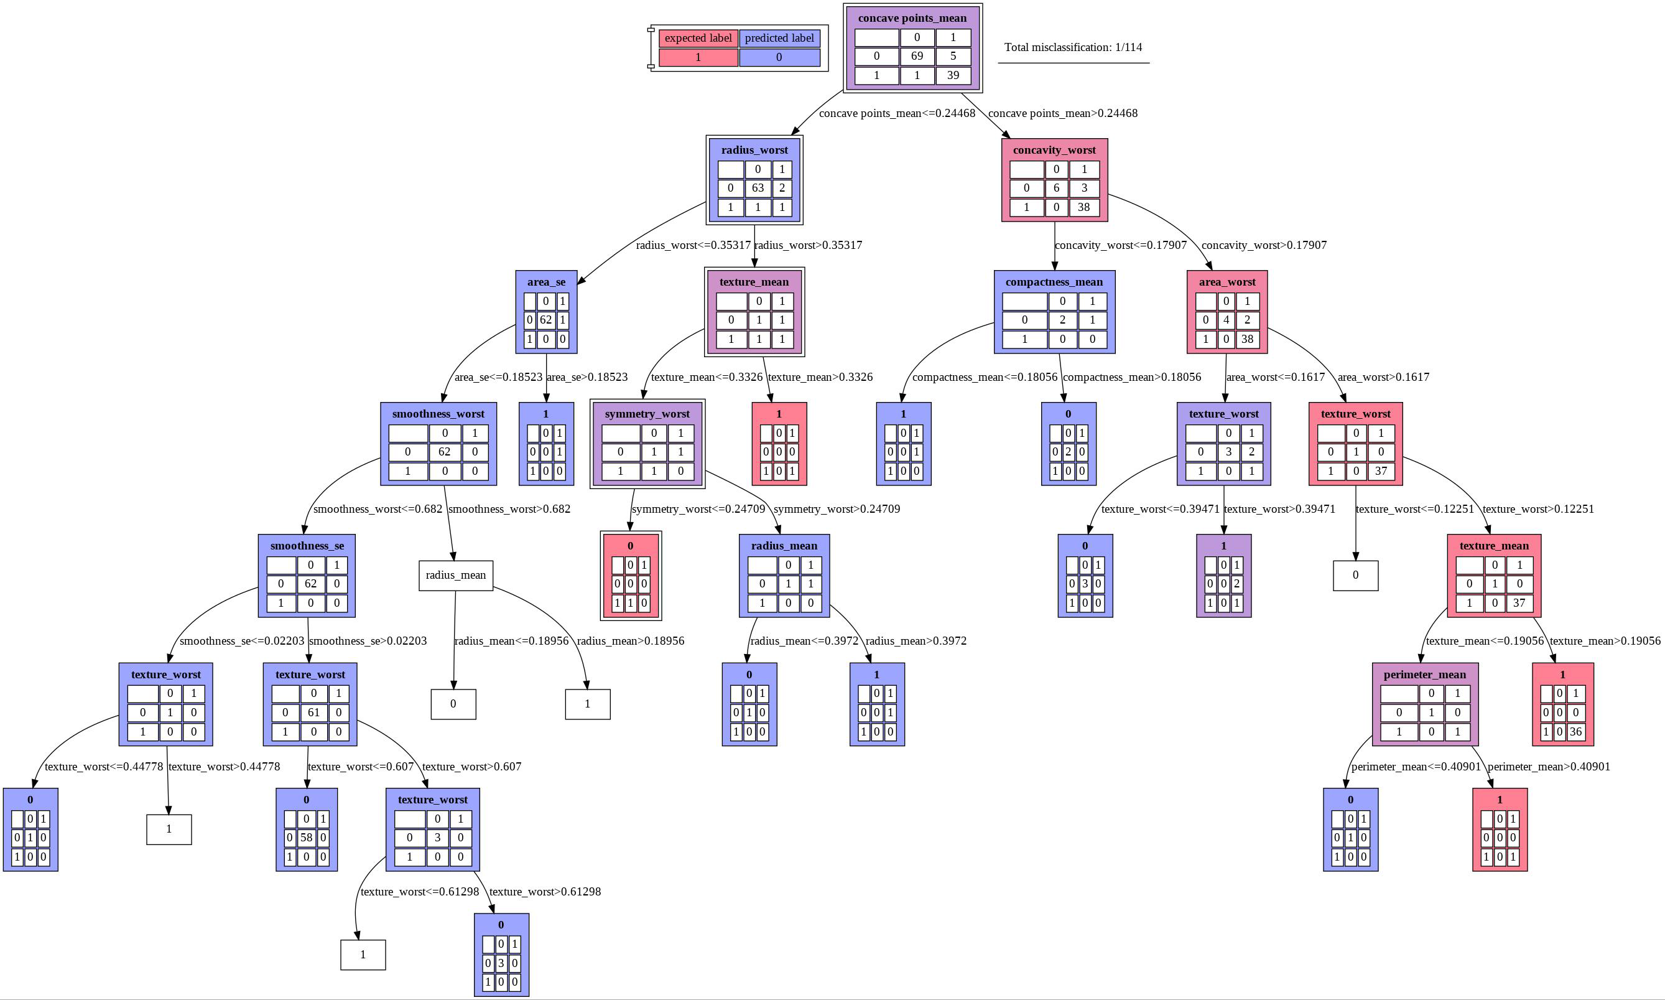

In [39]:
clf, plot = plot_misclassification(X_train, y_train, X_test, y_test, expected_label, predicted_label, '#ff8093', '#9ca5ff',
                           show_cm = True, present = 'all')
plot

We can see that if we delegently split the plain (i.e. without limiting the tree-depth), we will get the same misclassification as the KNN model. 

Let's trace the path that lead to the misclassification:

In [40]:
classification = clf.predict(X_test)
misclassified_samples_indices = [i for i in range(len(classification)) if classification[i] == predicted_label and y_test.iloc[i] == expected_label]

misclassification_to_predicates = extract_decision_predicate_by_path(clf, X_test.iloc[misclassified_samples_indices])
misclassification_stat_lst = []

history = set([])
representing_samples = []

for i in misclassification_to_predicates:
    if misclassification_to_predicates[i] in history: # avoid repeating the analysis for samples with same predicate
        continue
    else:
        history.add(misclassification_to_predicates[i])
        representing_samples.append(i)

    predicate = eval('lambda x: ' + misclassification_to_predicates[i])

    train_samples = X_train[predicate(X_train)]
    train_samples_classification = y_train[train_samples.index]
    train_classified_as_prediced = sum(train_samples_classification == predicted_label)
    train_classified_as_expcetd = sum(train_samples_classification == expected_label)

    test_samples = X_test[predicate(X_test)]
    test_samples_classification = y_test[test_samples.index]
    test_classified_as_prediced = sum(test_samples_classification == predicted_label)
    test_classified_as_expcetd = sum(test_samples_classification == expected_label)

    misclassification_stat_lst.append([train_classified_as_prediced, train_classified_as_expcetd, test_classified_as_prediced, test_classified_as_expcetd, misclassification_to_predicates[i]])

investigation_results = pd.DataFrame(data = misclassification_stat_lst, index = representing_samples, columns = ['train(predicted)', 'train(excpected)', 'test(prediced)', 'test(expcetd)', 'predicate'])
print(investigation_results.iloc[:,:-1])
print("total misclassification: %d" % sum(investigation_results['test(expcetd)']))

print("The predicate:",investigation_results.loc[514]['predicate'])
print()


     train(predicted)  train(excpected)  test(prediced)  test(expcetd)
514                 5                 0               0              1
total misclassification: 1
The predicate: (x['concave points_mean'] <= 0.24468190222978592) & (x['radius_worst'] > 0.3531746119260788) & (x['texture_mean'] <= 0.3326006084680557) & (x['symmetry_worst'] <= 0.24708956480026245)



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


We can see that during train time, 5 samples were correctly "classified" using the same predicate, so it is no wonder why during test time, samples with the same characteristics would be treated the same.

As for the SVM model, it is reasonable to claim that it classified the sample correctly by mistake, and the trade off was that it misclassified another sample.


# Conclusion

In this case, the misclassified sample was too similar to 5 other samples that appeared in the train set, so KNN classifier and the MAGIC tool, both splitting the plain, misclassify it; It seems that there was no other way.

The SVM, on the other hand, used a linear separtion and apparently "by mistake" correctly classified it but in expense of misclassifying another sample.

Here, the Scatter plot is more efficient to analyse the global phenomenon that lead to the misclassification, which is: Overlap between the two classes in the attributes plain.

Yet, the tree tool better pin-point the reason for the specific misclassification: a sample with almost-identical charectertics to 5 other samples with different class that appeared in the train-set.

<hr>

# Appendix: Illustrations For The Questionnaire

In the questionnaire, for the MAGIC tool I used a tree with max depth of 4 as it easier for the reader to comprehend a "shorter" tree. Note that limiting the depth didn't add more misclassified samples and therefore kept the same conclusions that were mentioned in this notebook.

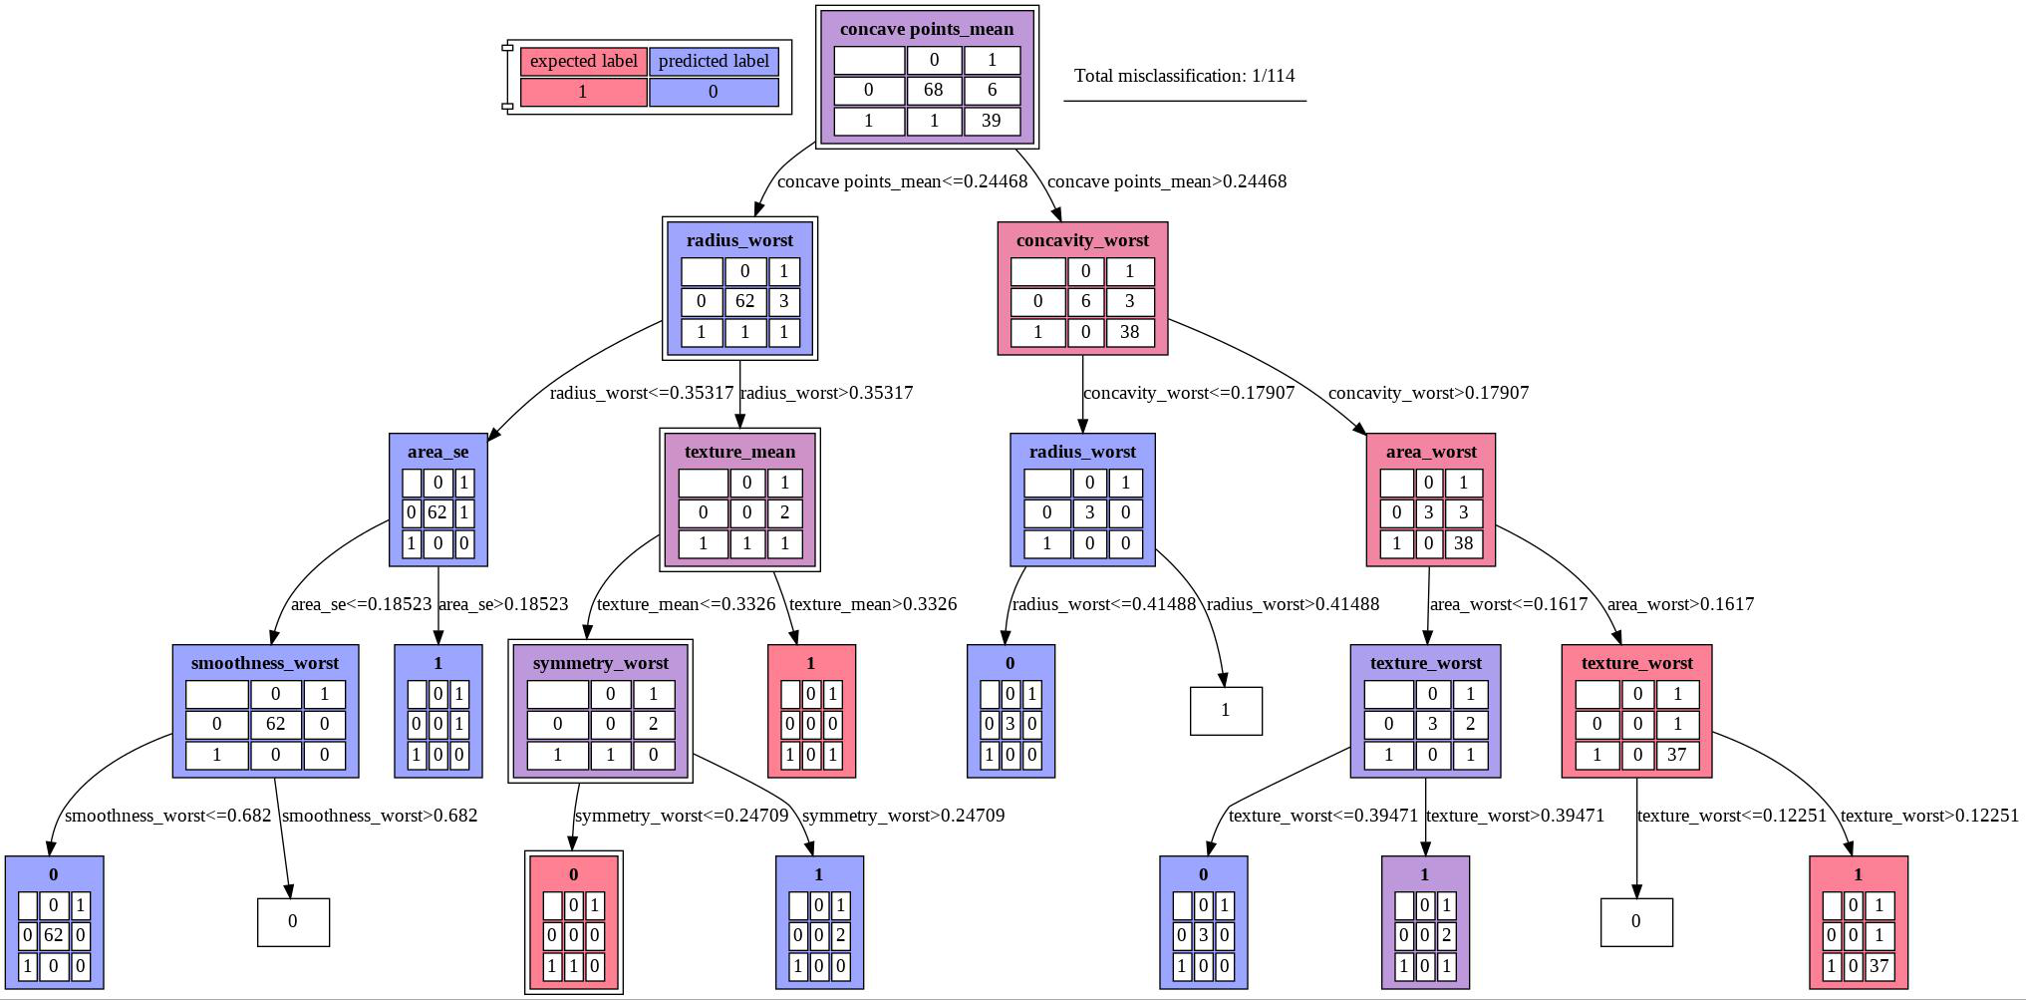

In [41]:
clf, plot = plot_misclassification(X_train, y_train, X_test, y_test, expected_label, predicted_label, '#ff8093', '#9ca5ff',
                           show_cm = True, present = 'all', max_depth = 4)
plot

As for the scatter plots, I chose to use only the 4 most correlated attributes with the target label, as mentioned above for simplicity reasons.

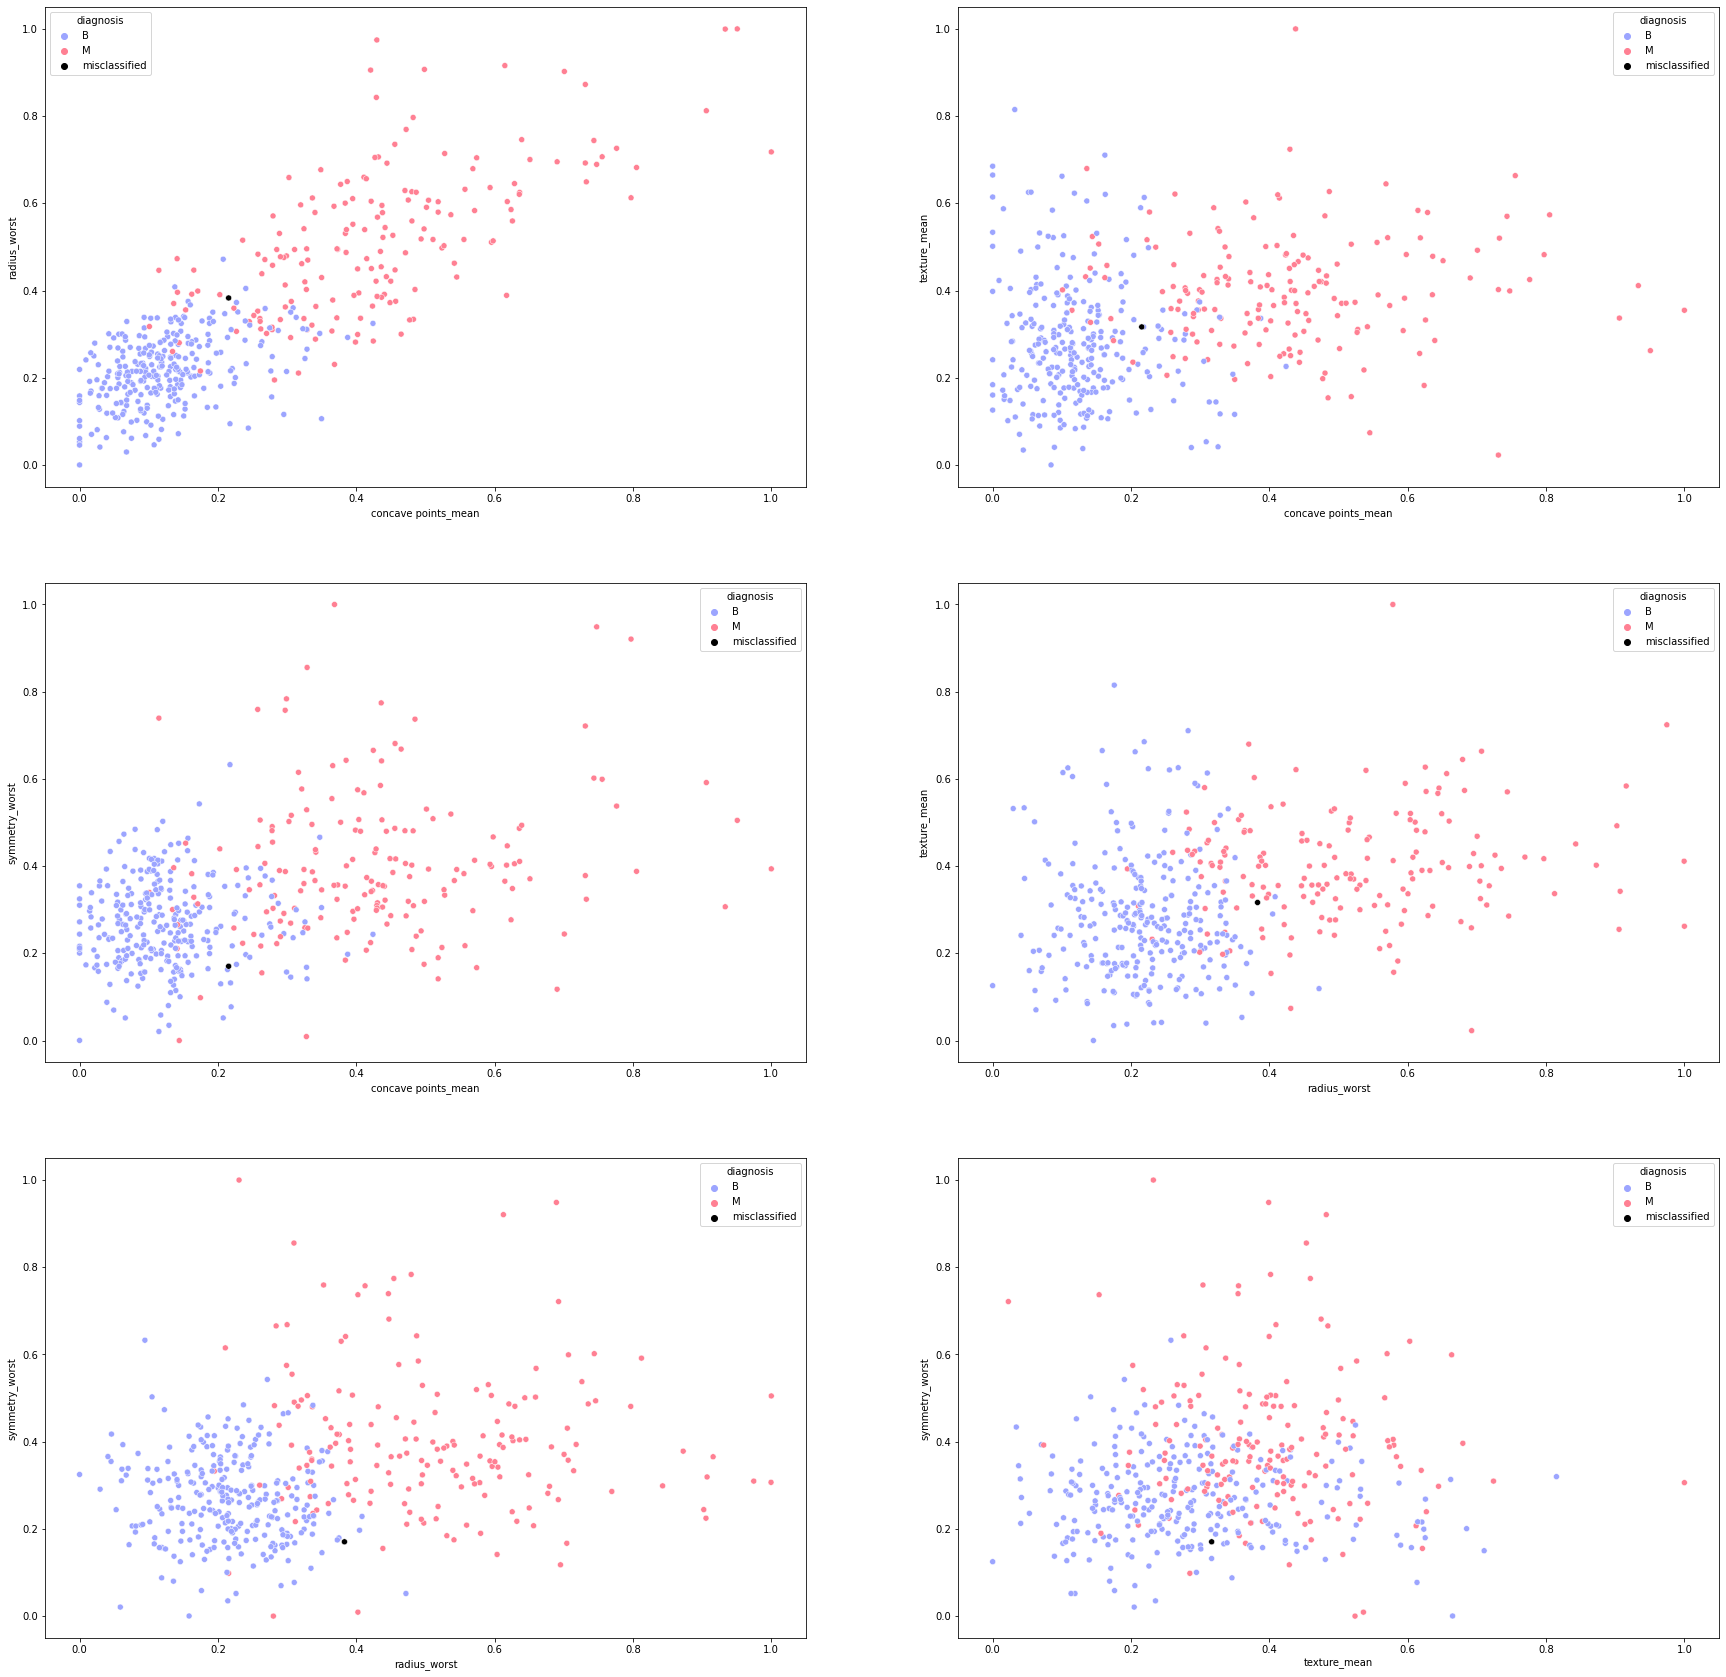

In [48]:
import math

x_ax_count = math.ceil(combinations_count / 2)
y_ax_count = 2

fig, axs = plt.subplots(x_ax_count,y_ax_count)
fig.set_size_inches(x_ax_count * 10, y_ax_count * 15)

ax_index = 0

for i in range(len(attributes)):
  for j in range(i + 1, len(attributes)):
      sns.scatterplot(x=attributes[i],y=attributes[j],hue=class_label,data=df1, ax = axs[int(ax_index / y_ax_count)][ax_index % y_ax_count], palette = color_dict)
      ax_index +=1